# Non-negative Matrix Factorization (NMF)

### Dataset

Single cell gene expression dataset of Peripheral blood mononuclear cells (PBMCs) from a healthy donor was downloaded from [10x Genomics](https://support.10xgenomics.com/single-cell-gene-expression/datasets/3.0.0/pbmc_1k_protein_v3). Completely empty rows (genes) were filtered out, then the matrix was row-normalized. The gene-cell matrix is saved as object 'smat' in single_cell_processed_normal.RData. The tag and gene names corresponding to each row of the matrix is saved in object 'genes_remain.'

### Dependencies
This code was developed and tested in R 3.6.0. [IRkernel](https://irkernel.github.io/installation/) was used to run R on Jupyter notebook. The [NMF package](https://cran.r-project.org/web/packages/NMF/index.html) is a key dependency.

In [2]:
library('Matrix')
library('NMF')
library('repr') #Should get automatically installed with IRkernel; comment out if not in Jupyter notebook

In [3]:
load('single_cell_processed_normal.RData')

In [4]:
scrna = as(smat,"matrix")
n = nrow(scrna)
m = ncol(scrna)
print(paste('Number of rows/genes =',n))
print(paste('Number of columns/cells =',m))

[1] "Number of rows/genes = 2118"
[1] "Number of columns/cells = 713"


In [6]:
k = 3
nmf_sc <- nmf(scrna, k, 'lee', seed=123, .options=list(track=TRUE))

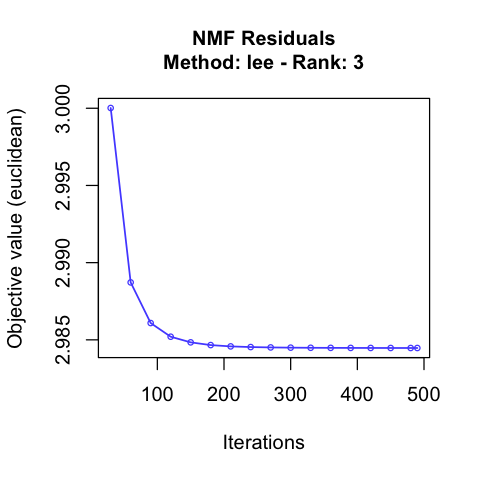

In [7]:
options(repr.plot.width=4, repr.plot.height=4) #comment out if not in Jupyter notebook
plot(nmf_sc)

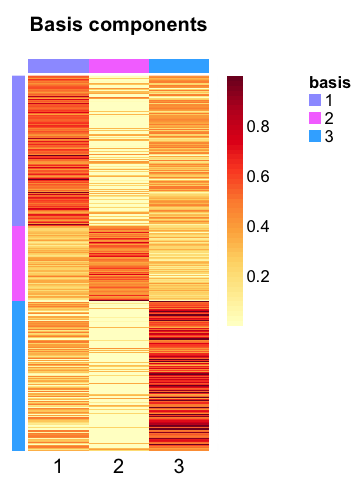

In [8]:
W = basis(nmf_sc)
hardcluster_W = apply(W, 1, which.max)

options(repr.plot.width=3, repr.plot.height=4) #comment out if not in Jupyter notebook
basismap(nmf_sc, Rowv=c(order(hardcluster_W)))

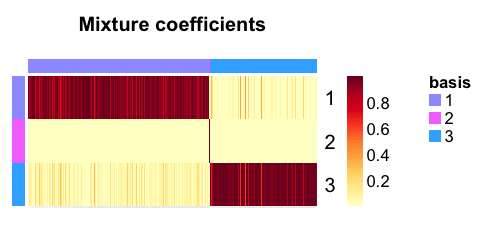

In [9]:
H = coef(nmf_sc)
hardcluster_H = apply(H, 2, which.max)

options(repr.plot.width=4, repr.plot.height=2) #comment out if not in Jupyter notebook
coefmap(nmf_sc, Colv=c(order(hardcluster_H)))

In [30]:
gene_names = as.vector(factor(genes_remain$V2))

softcluster_W = W/rowSums(W)

cluster1_topgene_idx = rev(tail(order(W[,1]),5))
cluster1_topgenes = gene_names[cluster1_topgene_idx]
cluster2_topgene_idx = rev(tail(order(W[,2]),5))
cluster2_topgenes = gene_names[cluster2_topgene_idx]
cluster3_topgene_idx = rev(tail(order(W[,3]),5))
cluster3_topgenes = gene_names[cluster3_topgene_idx]

print(paste('Cluster 1 represented by:',paste(cluster1_topgenes,collapse=", ")))
print(paste('Cluster 2 represented by:',paste(cluster2_topgenes,collapse=", ")))
print(paste('Cluster 3 represented by:',paste(cluster3_topgenes,collapse=", ")))

[1] "Cluster 1 represented by: IGLC2, TCL1A, TCF4, GZMB, MS4A1"
[1] "Cluster 2 represented by: IgG2b_control_TotalSeqB, MS4A1, IGHD, IGHM, NFKBID"
[1] "Cluster 3 represented by: PTGS2, CD300E, SIRPA, CDKN1C, MAFB"
